# Classify Kyphosis Diseas using Decision Trees and Random Forest Classifiers

## Problem Statement
 - Kyphosis is an abnormally excessive convex curvature of the spine. The kyphosis data frame has 81 rows and 4 columns representing data on children who have had corrective spinal surgery. The dataset contains 3 inputs and 1 output.
 

INPUTS:

 - Age: in months
 - Number: the number of vertebrae involved
 - Start the number of the first (topmost) vertebra operated on
 

OUTPUTS:

 - Kyphosis: a factor with levels indicating if a kyphosis (a type of deformation) was present after the operation

## Step #0: Libraries Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step #1: Load Dataset

In [2]:
df = pd.read_csv('Data\\kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


## Step #2: Visualize Dataset

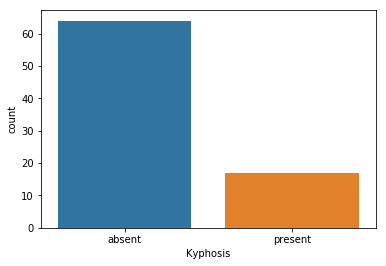

In [6]:
sns.countplot(df.Kyphosis);

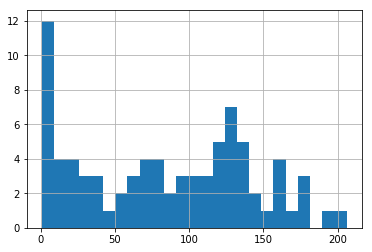

In [7]:
df['Age'].hist(bins=25);

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le_y = LabelEncoder()
df['Kyphosis'] = le_y.fit_transform(df['Kyphosis'])

In [9]:
df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [10]:
F = len(df[df['Kyphosis'] == 0])
T = len(df[df['Kyphosis'] == 1])
Tot = len(df)

print('Disease present after operation percentage = ',
      round(T/Tot * 100, 2), '%')
print('Disease absent after operation percentage  = ',
      round(F/Tot * 100, 2), '%')

Disease present after operation percentage =  20.99 %
Disease absent after operation percentage  =  79.01 %


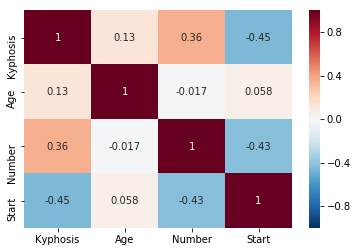

In [11]:
df_corr = df.corr()
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, cmap="RdBu_r");

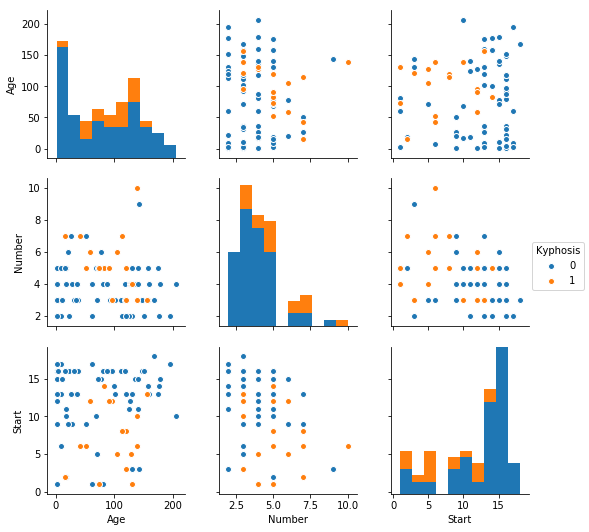

In [12]:
sns.pairplot(df, hue='Kyphosis', vars = ['Age', 'Number', 'Start']);

## Step #3: Create Testing and Training Dataset / Data Cleaning

In [13]:
df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [14]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30)

In [35]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((56, 3), (56,), (25, 3), (25,))

## Step #4: Training the Model

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
feat_imp = pd.DataFrame(tree_clf.feature_importances_,
                        index=X_train.columns,
                        columns=['importance']).sort_values('importance',
                                                            ascending=False)

In [39]:
feat_imp

,importance
Age,0.408923
Start,0.400324
Number,0.190754


## Step #5: Evaluate the Model

In [42]:
tree_train_pred = tree_clf.predict(X_train)

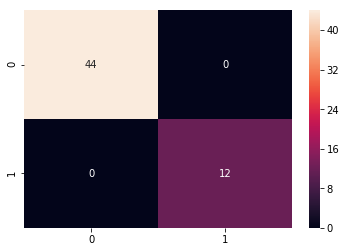

In [45]:
cm = confusion_matrix(y_train, tree_train_pred)
sns.heatmap(cm, annot=True);

In [40]:
tree_pred = tree_clf.predict(X_test)

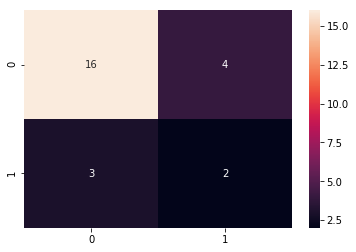

In [44]:
cm = confusion_matrix(y_test, tree_pred)
sns.heatmap(cm, annot=True);

In [46]:
print(classification_report(y_test, tree_pred))

             precision    recall  f1-score   support

          0       0.84      0.80      0.82        20
          1       0.33      0.40      0.36         5

avg / total       0.74      0.72      0.73        25



## Step #6: Improving the Model

In [47]:
rf_clf = RandomForestClassifier(n_estimators=150)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
rf_train_pred = rf_clf.predict(X_train)
rf_pred = rf_clf.predict(X_test)

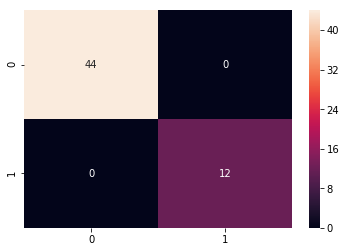

In [50]:
cm = confusion_matrix(y_train, rf_train_pred)
sns.heatmap(cm, annot=True);

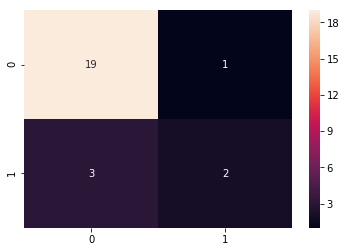

In [52]:
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True)

In [53]:
print(classification_report(y_test, rf_pred))

             precision    recall  f1-score   support

          0       0.86      0.95      0.90        20
          1       0.67      0.40      0.50         5

avg / total       0.82      0.84      0.82        25



Better! Probably could do better with scaled features.